In [19]:
import pandas as pd

# Cargar dataset
df = pd.read_csv("data/comentarios_deportivos.csv")

# Asegurar que los comentarios sean texto
df['comentario'] = df['comentario'].astype(str)

# Vista rápida
df.head()


,id,comentario,sentimiento
0,180,"Partido equilibrado, resultado justo.",Neutral
1,177,"Encuentro equilibrado, reparto justo de puntos.",Neutral
2,189,Resultado esperado dadas las circunstancias.,Neutral
3,132,Nuestro ataque no generó peligro suficiente.,Negativo
4,148,"Sin sobresaltos, rendimiento promedio.",Neutral


In [20]:
import re

# Función simple y efectiva para limpiar texto
def limpiar_texto_simple(texto):
    texto = texto.lower()
    texto = re.sub(r"[^a-záéíóúñü\s]", "", texto)  # Solo letras y espacios
    texto = re.sub(r"\s+", " ", texto).strip()
    return texto

# Aplicar limpieza
df['comentario_limpio'] = df['comentario'].apply(limpiar_texto_simple)

# Revisar ejemplos
df[['comentario', 'comentario_limpio']].sample(10)


,comentario,comentario_limpio
140,Muy poca intensidad durante todo el partido.,muy poca intensidad durante todo el partido
28,Empate que refleja claramente el rendimiento.,empate que refleja claramente el rendimiento
8,La defensa estuvo impecable hoy.,la defensa estuvo impecable hoy
23,Excelente rendimiento de todo el equipo.,excelente rendimiento de todo el equipo
81,"Mala estrategia, el técnico cometió errores.",mala estrategia el técnico cometió errores
70,"¡Gran esfuerzo colectivo, merecida victoria!",gran esfuerzo colectivo merecida victoria
59,"Mala estrategia, el técnico cometió errores.",mala estrategia el técnico cometió errores
173,El equipo pareció desorganizado en todo momento.,el equipo pareció desorganizado en todo momento
133,Muy poca intensidad durante todo el partido.,muy poca intensidad durante todo el partido
196,Rendimiento estable en defensa y ataque.,rendimiento estable en defensa y ataque


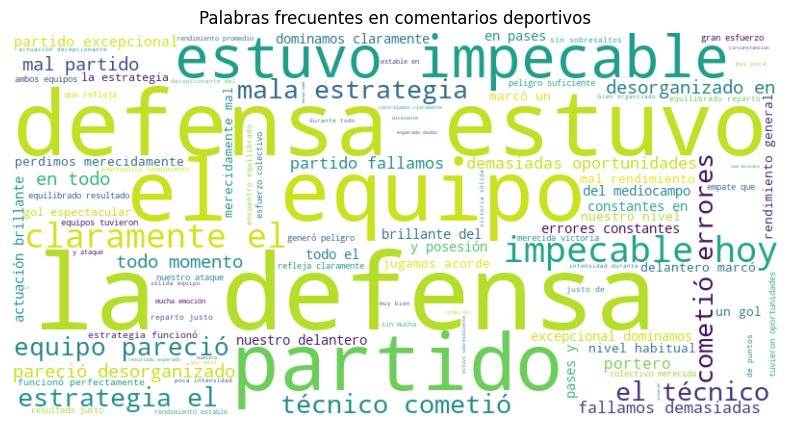

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filtrar comentarios útiles
df_filtrado = df[df['comentario_limpio'].str.strip().astype(bool)]

# Unir todos los comentarios limpios
texto_total = ' '.join(df_filtrado['comentario_limpio'])

# Generar nube
if texto_total:
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto_total)
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title("Palabras frecuentes en comentarios deportivos")
    plt.show()
else:
    print("⚠️ No hay palabras útiles después del preprocesamiento.")


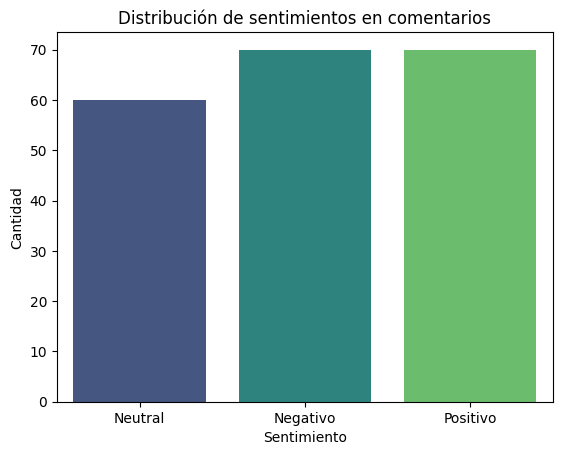

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Verificar columna
if 'sentimiento' in df.columns:
    sns.countplot(x='sentimiento', data=df, hue = 'sentimiento', palette='viridis')
    plt.title('Distribución de sentimientos en comentarios')
    plt.xlabel('Sentimiento')
    plt.ylabel('Cantidad')
    plt.show()
else:
    print("⚠️ No se encontró la columna 'sentimiento'.")


In [23]:
import ipywidgets as widgets
from IPython.display import display

sentimiento_widget = widgets.Dropdown(options=df['sentimiento'].unique(), description='Sentimiento:')

def mostrar_comentarios(sentimiento):
    seleccionados = df[df['sentimiento'] == sentimiento]
    display(seleccionados[['comentario', 'comentario_limpio']].sample(5))

widgets.interactive(mostrar_comentarios, sentimiento=sentimiento_widget)



interactive(children=(Dropdown(description='Sentimiento:', options=('Neutral', 'Negativo', 'Positivo'), value=…